In [1]:
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

df - = V, изначальный DataFrame звёзд c исключёнными бледные звёздами

df1 - иcключили бледные и близкие звёзды

df2 - = R, DataFrame полярных звёзд (для них создадим патерны)

# Отсечение звёзд с видимой зв. величиной > 7

In [2]:
df = pd.read_csv('materials/hygfull.csv')
len(df)

87475

In [3]:
df

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RA,Dec,Distance,Mag,AbsMag,Spectrum,ColorIndex
0,1,2,224690,,,NaN,NaN,0.000253,-19.498837,45.662100,9.27,5.972221,K3V,0.999
1,2,3,224699,,,NaN,NaN,0.000334,38.859286,355.871886,6.61,-1.146468,B9,-0.019
2,3,4,224707,,,NaN,NaN,0.000559,-51.893546,129.032258,8.06,2.506509,F0V,0.370
3,4,5,224705,,,NaN,NaN,0.000664,-40.591224,348.432056,8.55,0.839409,G8III,0.902
4,5,9,224708,,,NaN,NaN,0.002356,36.585938,207.900208,8.59,2.000725,G5,1.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87470,87471,0,,,NN 4385,,,23.995767,47.765021,16.722408,16.10,14.983506,m,+1.87
87471,87472,0,,,NN 4386,,,23.996236,-44.071646,18.518519,12.82,11.481969,M7,+1.64
87472,87473,0,,,NN 4387,,,23.996723,-34.103312,12.820513,12.80,12.260473,M4,
87473,87474,0,,,Gl 914 B,,,0.035162,27.095041,12.402332,9.00,8.532483,K6 V,


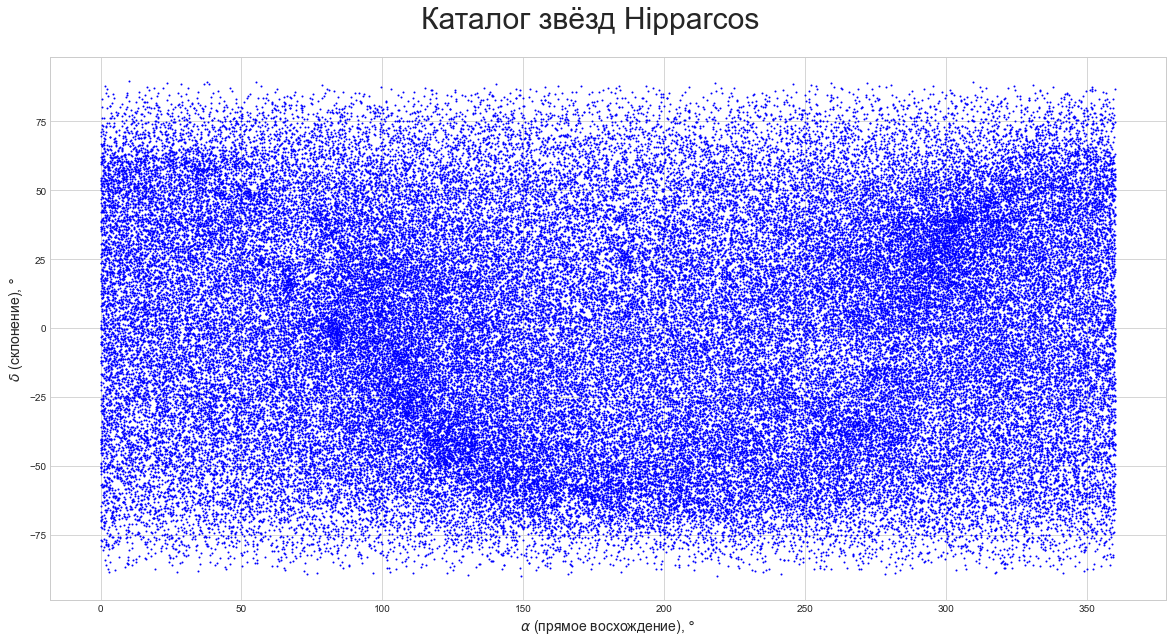

In [4]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Каталог звёзд Hipparcos', fontsize=30, y=0.95)

ax = fig.add_subplot()
ax.scatter(df.RA * 15, df.Dec, c ="blue", s=1)

ax.set_xlabel(r'$\alpha$ (прямое восхождение), $\degree$', fontsize=14)
ax.set_ylabel(r'$\delta$ (склонение), $\degree$', fontsize=14)

plt.show()

In [5]:
df.drop(df[df.Mag > 7].index, inplace=True) 	# Отсеиваем звёзды с видимой зв. величиной > 7
df.drop(df[df.Hip == 0].index, inplace=True) 	# Отсеиваем звёзды не входящие в Hipparcos catalog
df.RA = df.RA * 15 								# Перевод прямого восхождения из часов в градусы
df.reset_index(inplace=True) 					# Сквозная индексация
len(df)

15537

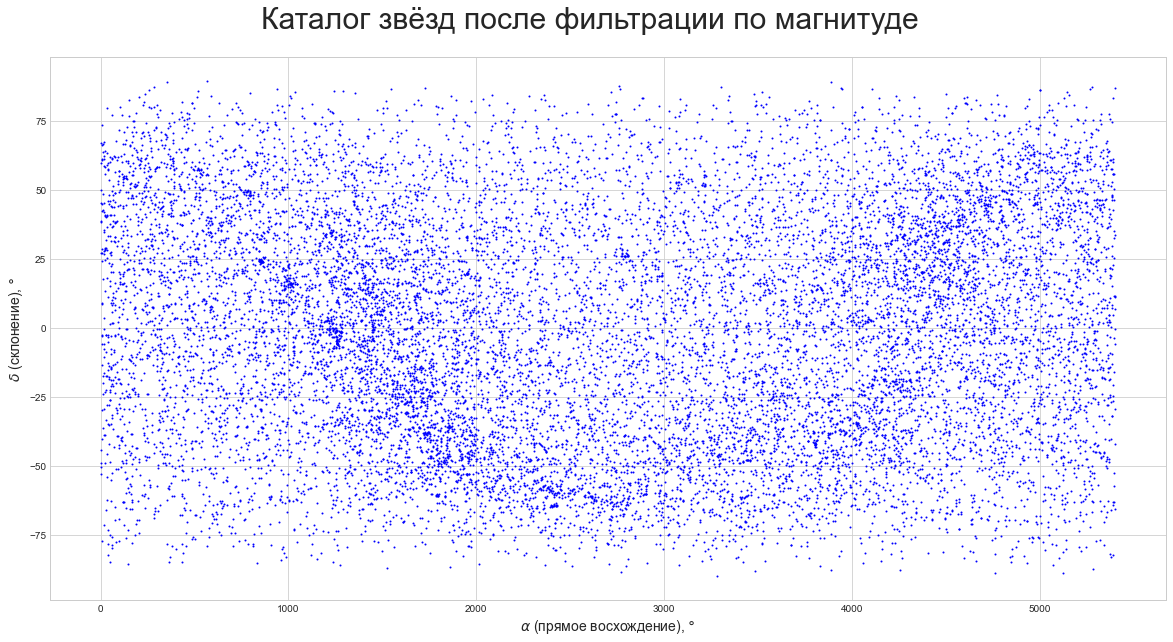

In [6]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Каталог звёзд после фильтрации по магнитуде', fontsize=30, y=0.95)

ax = fig.add_subplot()
ax.scatter(df.RA * 15, df.Dec, c ="blue", s=1)

ax.set_xlabel(r'$\alpha$ (прямое восхождение), $\degree$', fontsize=14)
ax.set_ylabel(r'$\delta$ (склонение), $\degree$', fontsize=14)

plt.show()

# Отсечение близких звёзд

In [7]:
df = df[['Hip','Mag','RA','Dec']]

In [8]:
df['RA_rad'] = df['RA'].apply(lambda x: x * math.pi / 180)
df['Dec_rad'] = df['Dec'].apply(lambda x: x * math.pi / 180)

C:\Users\Xiaomi\AppData\Local\Temp/ipykernel_13184/1248214307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RA_rad'] = df['RA'].apply(lambda x: x * math.pi / 180)
C:\Users\Xiaomi\AppData\Local\Temp/ipykernel_13184/1248214307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dec_rad'] = df['Dec'].apply(lambda x: x * math.pi / 180)


In [9]:
Pr = 7.5 * math.pi / 180
Dmin = 0.2 * math.pi / 180
errd = 0.02 * math.pi / 180
eps = 0.01 * math.pi / 180

In [10]:
try:
	df1 = pd.read_csv('materials/preproc1.csv')
except:
	df1 = df.copy()
	for i, Ri in df1.iterrows():
		Ri_del = Ri['Dec_rad']
		Ri_alph = Ri['RA_rad']
		str = df1[(df1.Dec_rad >= Ri_del - Pr) & (df1.Dec_rad <= Ri_del + Pr) & (df1.Dec_rad != Ri_del)][['RA_rad','Dec_rad']].values.tolist()
		for Rj in str:
			kek = math.sin(Ri_del) * math.sin(Rj[1]) + math.cos(Ri_del) * math.cos(Rj[1]) * math.cos(Ri_alph - Rj[0])
			teta = math.acos(max(-1,min(kek,1)))
			# print(Ri_alph, Ri_del, Rj, teta)
			if teta <= eps:
				print(i)
				df1.drop(df1[df1.Dec_rad == Ri_del].index, inplace=True)
				df1.drop(df1[df1.Dec_rad == Rj[1]].index, inplace=True)
				break
	df1.to_csv('preproc_df1/preproc1.csv', index = False)

In [11]:
print('df = ', len(df), 'df1 = ', len(df1))

df =  15537 df1 =  15428


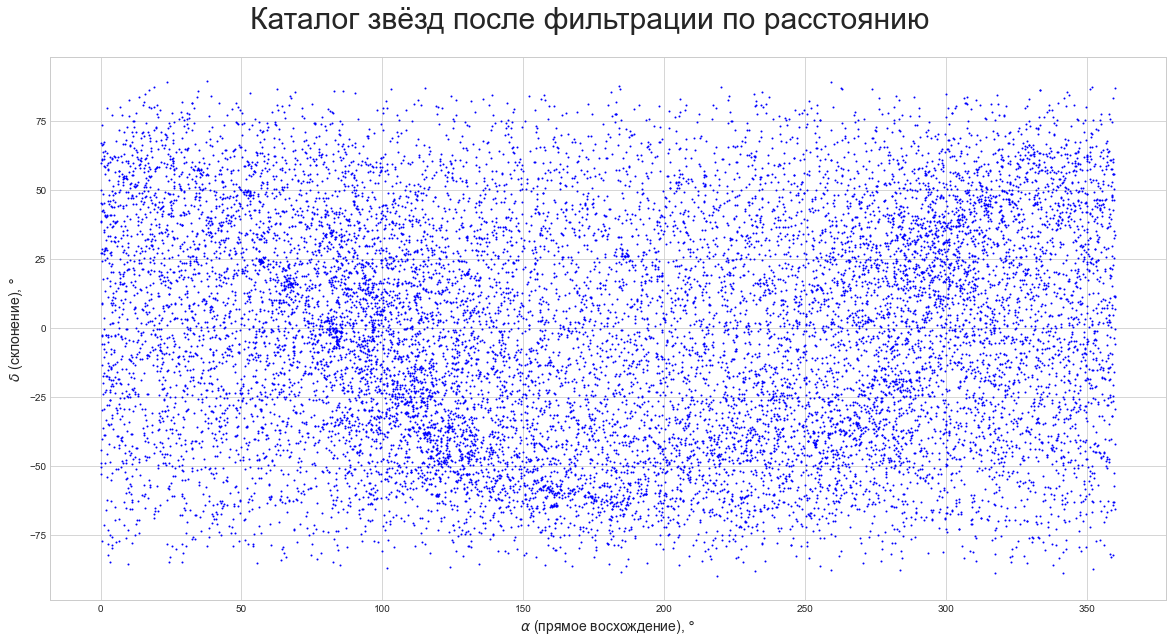

In [12]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Каталог звёзд после фильтрации по расстоянию', fontsize=30, y=0.95)

ax = fig.add_subplot()
ax.scatter(df1.RA, df1.Dec, c ="blue", s=1)

ax.set_xlabel(r'$\alpha$ (прямое восхождение), $\degree$', fontsize=14)
ax.set_ylabel(r'$\delta$ (склонение), $\degree$', fontsize=14)

plt.show()

# Каталог типа B (выделение полярных звёзд)

In [13]:
fv2 = 7.5 / 2
chi = 10

In [14]:
try:
	df2 = pd.read_csv('materials/preproc2.csv')
except:
	df2 = df1.copy()
	for p_delta in range(-90,91):
		for p_alfa in range(0,361):
			if p_alfa > 360 - fv2:
				df2_select = df2[((df2.RA >= p_alfa - fv2) | (df2.RA < p_alfa - 360 + fv2)) & (df2.Dec >= p_delta - fv2) & (df2.Dec < p_delta + fv2)]
			else:
				df2_select = df2[(df2.RA >= p_alfa - fv2) & (df2.RA < p_alfa + fv2) & (df2.Dec >= p_delta - fv2) & (df2.Dec < p_delta + fv2)]
			df2_select.sort_values('Mag', ascending = False, inplace = True)
			if len(df2_select) - chi > 0:
				df2.drop(df2_select.head(len(df2_select) - chi).index, inplace = True)
	df2.to_csv('preproc_df1/preproc2.csv', index = False)
	

In [15]:
print('df = ', len(df), 'df1 = ', len(df1), 'df2 = ',len(df2))

df =  15537 df1 =  15428 df2 =  6610


In [16]:
print('Среднее значение видимой зв. величины \nдо удаления бледных звёзд: ', df1['Mag'].mean(), 
'\nпосле удаления бледных звёзд: ', df2['Mag'].mean())
print('Количество звёзд\nдо:', len(df1), '\nпосле: ', len(df2))

Среднее значение видимой зв. величины 
до удаления бледных звёзд:  6.121919885921726 
после удаления бледных звёзд:  5.5111180030257305
Количество звёзд
до: 15428 
после:  6610


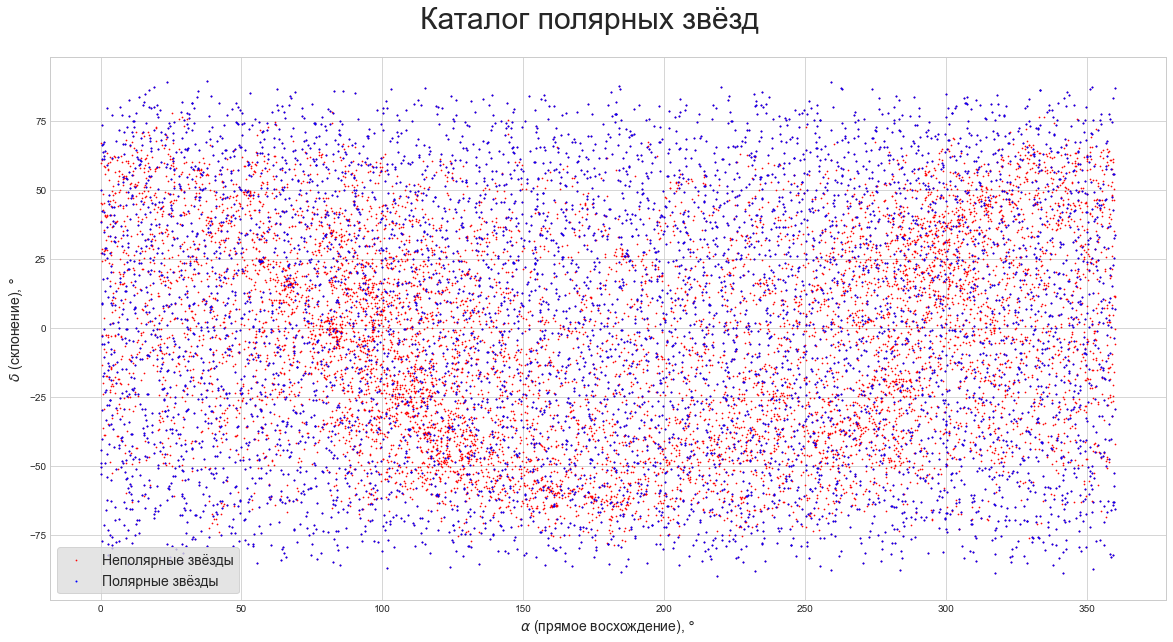

In [17]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Каталог полярных звёзд', fontsize=30, y=0.95)

ax = fig.add_subplot()
ax.scatter(df1.RA, df1.Dec, c ="red", s=0.5, label='Неполярные звёзды')
ax.scatter(df2.RA, df2.Dec, c ="blue", s=1, label='Полярные звёзды')

ax.set_xlabel(r'$\alpha$ (прямое восхождение), $\degree$', fontsize=14)
ax.set_ylabel(r'$\delta$ (склонение), $\degree$', fontsize=14)

legend = ax.legend(fontsize=18, frameon = 1, prop={'size': 14})
frame = legend.get_frame()
frame.set_facecolor('#dedede')

plt.show()

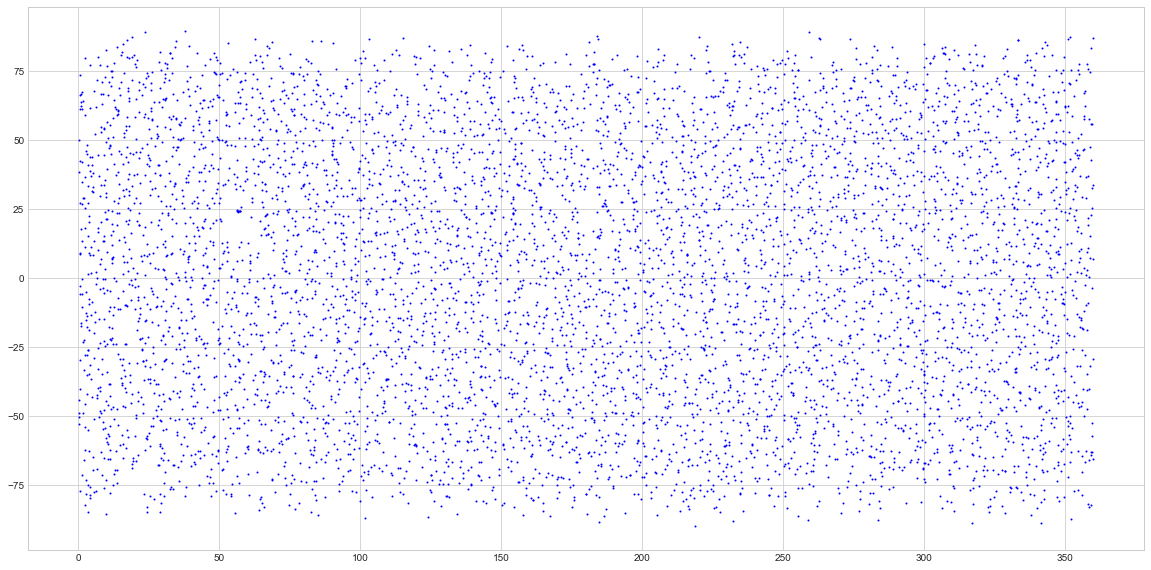

In [18]:
plt.figure(figsize=(20, 10))
plt.scatter(df2.RA, df2.Dec, c ="blue", s=1)
plt.show()

In [19]:
df2

,Hip,Mag,RA,Dec,RA_rad,Dec_rad
0,19,6.53,0.053317,38.304086,0.000931,0.668532
1,25,6.28,0.079365,-44.290297,0.001385,-0.773012
2,50,6.49,0.142871,-53.097663,0.002494,-0.926729
3,88,5.71,0.269160,-48.809859,0.004698,-0.851893
4,106,6.22,0.330165,49.981585,0.005762,0.872343
...,...,...,...,...,...,...
6605,118268,4.03,359.827510,6.863594,6.280175,0.119792
6606,118277,5.59,359.866257,-29.485153,6.280851,-0.514613
6607,118281,5.81,359.872224,33.724133,6.280955,0.588597
6608,118285,6.75,359.876557,86.706407,6.281031,1.513312


In [20]:
# Создадим матрицу со значениями RA_rad и Dec_rad всех звёзд из df2
# Индекс строки будет совпадать с индексом по датафрейму

df2_coordinates_matrix = []
for i, Ri in df2.iterrows():
	df2_coordinates_matrix.append([Ri[4], Ri[5]])	#	 Ri[4] - RA_rad;	 Ri[5] - Dec_rad

In [21]:
df2_coordinates_matrix[1:10]

[[0.001385185796833, -0.7730115164920169],
 [0.0024935606289705, -0.9267290404501124],
 [0.0046977203606863, -0.8518927503003125],
 [0.0057624584708654, 0.8723432237899429],
 [0.0058259474404006, -0.8785533506618315],
 [0.0069704820039809, -1.345043125949682],
 [0.0070554123433768, 1.068539508150352],
 [0.0072215554708619, 1.284769615939901],
 [0.0073891803828819, -0.7007264114599029]]

In [22]:
print(np.shape(df2_coordinates_matrix))

(6610, 2)


# Создание патернов звёзд

In [23]:
Pr = 7.5 * math.pi / 180
Dmin = 0.2 * math.pi / 180
errd = 0.02 * math.pi / 180
Nmax = int(np.fix((Pr - Dmin) / errd) + 1)

Создаём паттерны для звёзд из df2 по df1

In [24]:
try:
	df_pattern = pd.read_csv('materials/df_pattern.csv')
	df_pattern.columns = df_pattern.columns.astype(int) # Делаем название столбцов интами (не '1', а 1)
	pattern_list = df_pattern.to_numpy()
except:
	pattern_list = []
	for i, Ri in df2.iterrows():				# Создаём паттерн для i-й звезды
		pattern_list_loc = [0 for _ in range(Nmax)]
		Ri_del =  Ri['Dec_rad']
		Ri_alph = Ri['RA_rad']
		Ri_hip = int(Ri['Hip'])
		str = df1[(df1.Dec_rad >= Ri_del - Pr) & (df1.Dec_rad <= Ri_del + Pr)][['RA_rad','Dec_rad', 'Hip']].values.tolist()	# Список рассматриваемых j-х звёзд
		for Rj in str:							# Проверка потенциального соседа
			kek = math.sin(Ri_del) * math.sin(Rj[1]) + math.cos(Ri_del) * math.cos(Rj[1]) * math.cos(Ri_alph - Rj[0])
			teta = math.acos(max(-1,min(kek,1)))
			if teta < Pr and teta >= Dmin:
				index = int(np.fix((teta - Dmin) / errd)) # номер кольца патерна, в которое попадает звезда
				pattern_list_loc[index] = 1	  # Если j-я звезда находится близко к i-й звезде, то в соответствующем круге ставим 1
		pattern_list.append(np.array(pattern_list_loc))
	df_pattern = pd.DataFrame(data=pattern_list)
	pattern_list = np.array(pattern_list)
	df_pattern.to_csv('preproc_df1/df_pattern.csv', index = False)

In [25]:
df_pattern

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6606,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6607,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Все звёзды в n-ом столбце имеют на n-ой окружности больше 0 звёзд (df_pattern[n].unique)

# Поиск Rmin и бета

Rmin - звезда с минимальным количество единиц в паттерне

бета = количеству единиц в паттерне звезды Rmin

In [26]:
sums = []
for Ri in pattern_list:
	sums.append(Ri.sum())
sums = np.array(sums)

In [27]:
beta = sums.min() - 1
Rmin_index = sums.argmin() 	# индекс звезды с минимальным числом единиц

In [28]:
print(beta, '\n', Rmin_index, '\n', pattern_list[Rmin_index])

22 
 421 
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]


# Создание тестового изображения звёзного датчика

Выбираем из df1

In [29]:
alfa_min = 30
alfa_max = 60
delta_min = 30
delta_max = 60
df_test = df1[(df1.Dec >= delta_min) & (df1.Dec <= delta_max) & (df1.RA >= alfa_min) & (df1.RA <= alfa_max)]

In [30]:
df_test

,Hip,Mag,RA,Dec,RA_rad,Dec_rad
1105,9359,6.87,30.062499,44.420103,0.524690,0.775277
1108,9403,6.72,30.201804,59.959396,0.527121,1.046489
1111,9438,6.85,30.306798,41.212355,0.528953,0.719291
1122,9505,4.99,30.575309,54.487549,0.533640,0.950987
1133,9570,5.50,30.741528,33.284152,0.536541,0.580918
...,...,...,...,...,...,...
2214,18547,6.54,59.513029,34.814049,1.038698,0.607620
2216,18565,6.32,59.621392,38.840350,1.040590,0.677892
2219,18602,6.96,59.707606,57.450977,1.042094,1.002709
2221,18614,3.98,59.741249,35.791027,1.042681,0.624671


In [31]:
df_test.reset_index(inplace=True)

In [32]:
df_test_pole_stars = df2[(df2.Dec >= delta_min) & (df2.Dec <= delta_max) & (df2.RA >= alfa_min) & (df2.RA <= alfa_max)]
df_test_pole_stars

,Hip,Mag,RA,Dec,RA_rad,Dec_rad
581,9505,4.99,30.575309,54.487549,0.533640,0.950987
589,9570,5.50,30.741528,33.284152,0.536541,0.580918
598,9640,2.10,30.974663,42.329848,0.540610,0.738795
611,9977,4.78,32.121441,37.859183,0.560625,0.660767
612,9990,5.66,32.169086,58.423605,0.561456,1.019684
...,...,...,...,...,...,...
1087,18434,5.49,59.119534,35.080908,1.031831,0.612277
1090,18453,5.28,59.151816,50.695692,1.032394,0.884807
1093,18532,2.90,59.463421,40.010273,1.037832,0.698311
1095,18565,6.32,59.621392,38.840350,1.040590,0.677892


In [35]:
RA_min = df_test['RA_rad'].min()
# Dec_min = df_test['Dec_rad'].min()
df_test['RA_rad_0'] = df_test['RA_rad'].apply(lambda x: x - RA_min)
df_test['Dec_rad_0'] = df_test['Dec_rad'] # .apply(lambda x: x - Dec_min)
df_test_pole_stars['RA_rad_0'] = df_test_pole_stars['RA_rad'].apply(lambda x: x - RA_min)
df_test_pole_stars['Dec_rad_0'] = df_test_pole_stars['Dec_rad'] # .apply(lambda x: x - Dec_min)
pole_stars_on_image = len(df_test_pole_stars)

C:\Users\Xiaomi\AppData\Local\Temp/ipykernel_13184/1469607465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RA_rad_0'] = df_test['RA_rad'].apply(lambda x: x - RA_min)
C:\Users\Xiaomi\AppData\Local\Temp/ipykernel_13184/1469607465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Dec_rad_0'] = df_test['Dec_rad'] # .apply(lambda x: x - Dec_min)
C:\Users\Xiaomi\AppData\Local\Temp/ipykernel_13184/1469607465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

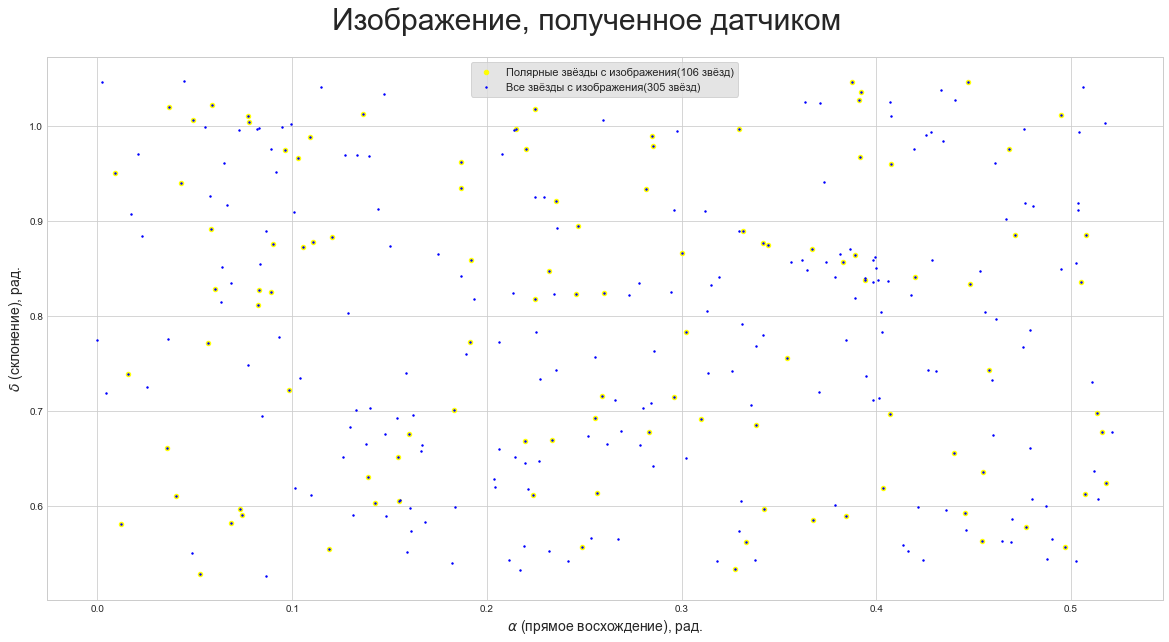

In [36]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Изображение, полученное датчиком', fontsize=30, y=0.95)

ax = fig.add_subplot()
ax.scatter(df_test_pole_stars.RA_rad_0, df_test_pole_stars.Dec_rad_0, c ="yellow", s=20, label=f'Полярные звёзды с изображения({pole_stars_on_image} звёзд)')
ax.scatter(df_test.RA_rad_0, df_test.Dec_rad_0, c ="blue", s=2, label=f'Все звёзды с изображения({len(df_test)} звёзд)')
ax.set_xlabel(r'$\alpha$ (прямое восхождение), рад.', fontsize=14)
ax.set_ylabel(r'$\delta$ (склонение), рад.', fontsize=14)

legend = ax.legend(fontsize=18, frameon = 1, prop={'size': 11})
frame = legend.get_frame()
frame.set_facecolor('#dedede')

plt.show()

# Создание паттернов для звёзд с изображения

In [37]:
pattern_list_test = []
for i, Ri in df_test.iterrows():
	pattern_list_loc = [0 for _ in range(Nmax)]
	Ri_del =  Ri['Dec_rad_0']
	Ri_alph = Ri['RA_rad_0']
	str = df_test[(df_test.Dec_rad_0 >= Ri_del - 4 * Pr) & (df_test.Dec_rad_0 <= Ri_del + 4 * Pr)][['RA_rad_0','Dec_rad_0']].values.tolist()
	for Rj in str:
		kek = math.sin(Ri_del) * math.sin(Rj[1]) + math.cos(Ri_del) * math.cos(Rj[1]) * math.cos(Ri_alph - Rj[0])
		teta = math.acos(max(-1,min(kek,1)))
		if teta < Pr and teta >= Dmin:
			index = int(np.fix((teta - Dmin) / errd)) #номер кольца патерна, в которое попадает звезда
			pattern_list_loc[index] = 1
			# print(index, pattern_list_loc[index])
	pattern_list_test.append(np.array(pattern_list_loc))
	
pattern_list_test = np.array(pattern_list_test)

In [38]:
df_pattern_test = pd.DataFrame(data=pattern_list_test)

In [39]:
df_pattern_test

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
303,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


# Определяем совпадения паттернов с изображения и по всем звёздам

In [40]:
np.shape(pattern_list)

(6610, 365)

In [41]:
type(pattern_list_test[0])

numpy.ndarray

count_matrix - матрица, содержащая все скалярные произведения паттернов

размер матрицы: n x m

n - количество звёзд на карте неба

m - количество звёзд на тестовом изображении

In [42]:
count_matrix = []
for Ri_pattern in pattern_list:
	count_row = []
	for Rj_pattern in pattern_list_test:
		count_row.append(np.dot(Ri_pattern, Rj_pattern))
	count_matrix.append(count_row)
count_matrix = np.array(count_matrix)

In [43]:
np.shape(count_matrix)

(6610, 305)

In [44]:
print(count_matrix)

[[7 6 7 ... 6 6 4]
 [6 3 3 ... 3 5 4]
 [5 3 1 ... 6 3 5]
 ...
 [7 3 7 ... 8 5 8]
 [6 4 7 ... 4 3 7]
 [5 4 3 ... 8 5 7]]


In [45]:
df_count = pd.DataFrame(count_matrix)

In [46]:
df_count

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
0,7,6,7,7,5,6,9,6,7,6,...,7,11,11,7,5,8,6,6,6,4
1,6,3,3,5,4,3,8,7,8,6,...,3,12,6,5,11,3,8,3,5,4
2,5,3,1,3,6,5,7,2,9,6,...,4,9,4,6,5,1,5,6,3,5
3,4,2,6,5,4,5,5,7,4,6,...,1,8,8,4,7,4,3,7,7,6
4,6,9,7,13,9,8,13,12,12,13,...,8,14,10,6,5,6,10,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6605,6,4,3,4,4,4,8,5,10,6,...,3,12,3,5,4,3,4,4,6,5
6606,6,5,2,8,5,5,10,4,8,7,...,2,6,7,7,3,2,8,2,5,8
6607,7,3,7,9,4,7,11,9,13,11,...,7,16,10,11,9,8,6,8,5,8
6608,6,4,7,7,5,3,17,13,9,5,...,8,16,8,5,9,9,6,4,3,7


In [47]:
df_count.describe()

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
count,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,...,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000
mean,6.015431,5.816188,6.132375,8.373828,5.051437,6.422239,10.090772,7.967927,9.440242,7.717700,...,5.427837,10.654614,7.918608,6.993343,6.606657,5.481997,7.073979,5.781241,6.417095,6.824962
std,2.795345,2.778331,2.793687,3.673035,2.441090,2.925993,4.092913,3.514086,3.859597,3.331151,...,2.733541,4.382224,3.401783,3.120220,3.029369,2.775461,3.170421,2.793538,3.034105,3.067321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,5.000000,...,3.000000,8.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
50%,6.000000,5.000000,6.000000,8.000000,5.000000,6.000000,10.000000,7.000000,9.000000,7.000000,...,5.000000,10.000000,7.000000,7.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000
75%,8.000000,8.000000,8.000000,10.000000,7.000000,8.000000,12.000000,10.000000,12.000000,10.000000,...,7.000000,13.000000,10.000000,9.000000,8.000000,7.000000,9.000000,7.000000,8.000000,9.000000
max,19.000000,19.000000,18.000000,45.000000,23.000000,31.000000,30.000000,29.000000,32.000000,24.000000,...,33.000000,53.000000,26.000000,23.000000,33.000000,19.000000,35.000000,19.000000,35.000000,20.000000


In [48]:
count_matrix_tr = count_matrix.transpose()
print(count_matrix, '\n', np.shape(count_matrix))
print(count_matrix_tr, '\n', np.shape(count_matrix_tr))

[[7 6 7 ... 6 6 4]
 [6 3 3 ... 3 5 4]
 [5 3 1 ... 6 3 5]
 ...
 [7 3 7 ... 8 5 8]
 [6 4 7 ... 4 3 7]
 [5 4 3 ... 8 5 7]] 
 (6610, 305)
[[7 6 5 ... 7 6 5]
 [6 3 3 ... 3 4 4]
 [7 3 1 ... 7 7 3]
 ...
 [6 3 6 ... 8 4 8]
 [6 5 3 ... 5 3 5]
 [4 4 5 ... 8 7 7]] 
 (305, 6610)


In [49]:
np.shape(count_matrix_tr)[1]

6610

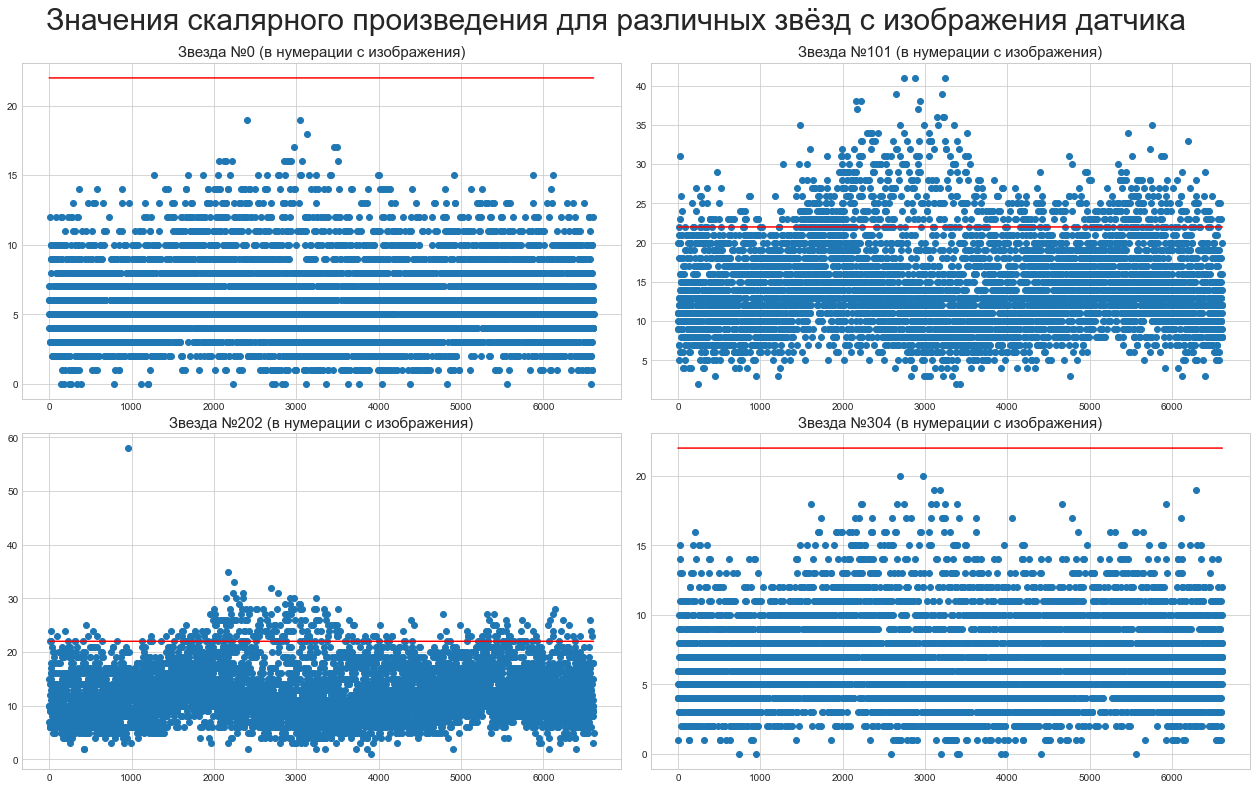

In [50]:
y_size = np.shape(count_matrix_tr)[0]
x_size = np.shape(count_matrix_tr)[1]
x = [i for i in range(x_size)]
betas_list = [beta for _ in range(x_size)]

star_num_1 = 0
star_num_2 = (y_size - 1) * 1 // 3
star_num_3 = (y_size - 1) * 2 // 3
star_num_4 = y_size - 1

fig = plt.figure(figsize=(22, 13)) 
fig.suptitle('Значения скалярного произведения для различных звёзд с изображения датчика', fontsize=30, y=0.94)

ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(x, count_matrix_tr[star_num_1])
ax1.plot(x, betas_list, c='red')
ax1.set_title(f'Звезда №{star_num_1} (в нумерации с изображения)', y=1, fontsize=15)

ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(x, count_matrix_tr[star_num_2])
ax2.plot(x, betas_list, c='red')
ax2.set_title(f'Звезда №{star_num_2} (в нумерации с изображения)', y=1, fontsize=15)

ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(x, count_matrix_tr[star_num_3])
ax3.plot(x, betas_list, c='red')
ax3.set_title(f'Звезда №{star_num_3} (в нумерации с изображения)', y=1, fontsize=15)

ax4 = fig.add_subplot(2, 2, 4)
ax4.scatter(x, count_matrix_tr[star_num_4])
ax4.plot(x, betas_list, c='red')
ax4.set_title(f'Звезда №{star_num_4} (в нумерации с изображения)', y=1, fontsize=15)

plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.show()

# Создание словаря кандидатов звёзд

In [51]:
beta

22

In [52]:
candidates = dict()
for Ri_ind, Ri in enumerate(count_matrix_tr):
	Ri_max = Ri.max()
	if (Ri_max - 1 <= beta):
# 		print(Ri_ind)
		continue
	Ri_candidates = []
	for name_num, name_count in enumerate(Ri):
		if (Ri_max - 1 <= name_count):
			Ri_candidates.append(name_num)
	if Ri_candidates:
		candidates[Ri_ind] = Ri_candidates


In [53]:
candidates

{3: [581],
 5: [598],
 6: [3151],
 7: [2741],
 8: [2591],
 9: [2379, 2661],
 10: [611],
 11: [2238],
 12: [612],
 13: [618],
 14: [620],
 17: [627],
 19: [2106, 2365, 2669, 3081],
 20: [637],
 21: [2935, 3237],
 22: [639],
 23: [640],
 24: [642],
 25: [2227, 3073],
 26: [3073],
 27: [2591, 2929, 3491],
 28: [2698, 2743, 2915, 3412],
 29: [649],
 30: [2165, 2225, 2862, 3048, 3206, 3349],
 31: [1517, 2645, 2929, 2986, 3244],
 32: [653],
 33: [654],
 34: [656],
 35: [2225],
 36: [658],
 37: [2238],
 38: [663],
 39: [3067],
 40: [664],
 41: [3048],
 42: [2698],
 44: [2225, 2227, 2273, 2389, 3032, 3048],
 45: [669],
 46: [1954, 2225, 2938, 3237, 3412],
 47: [670],
 48: [2148, 2149, 2216, 2308, 3042, 3067, 3069, 3112, 3349],
 49: [2227],
 50: [1987, 2203, 2365, 2778, 2975, 3067, 3069],
 51: [677],
 52: [679],
 53: [2225],
 54: [3131],
 55: [1619, 2698, 3042, 3131, 3412, 3487],
 56: [683],
 57: [3032],
 58: [685],
 59: [689],
 60: [2935],
 61: [691],
 63: [697],
 64: [698],
 65: [2272, 3073],

# Обработка df_test

In [54]:
df_test_with_cand = df_test.loc[list(candidates.keys())].copy()
df_test_with_cand

,index,Hip,Mag,RA,Dec,RA_rad,Dec_rad,RA_rad_0,Dec_rad_0
3,1122,9505,4.99,30.575309,54.487549,0.533640,0.950987,0.008950,0.950987
5,1144,9640,2.10,30.974663,42.329848,0.540610,0.738795,0.015920,0.738795
6,1146,9656,6.66,31.054743,51.967831,0.542008,0.907010,0.017318,0.907010
7,1151,9723,6.53,31.265839,55.622361,0.545692,0.970793,0.021002,0.970793
8,1153,9754,6.99,31.361917,50.643274,0.547369,0.883892,0.022679,0.883892
...,...,...,...,...,...,...,...,...,...
296,2199,18453,5.28,59.151816,50.695692,1.032394,0.884807,0.507704,0.884807
297,2207,18499,6.84,59.317928,41.880660,1.035293,0.730955,0.510604,0.730955
299,2211,18532,2.90,59.463421,40.010273,1.037832,0.698311,0.513143,0.698311
301,2216,18565,6.32,59.621392,38.840350,1.040590,0.677892,0.515900,0.677892


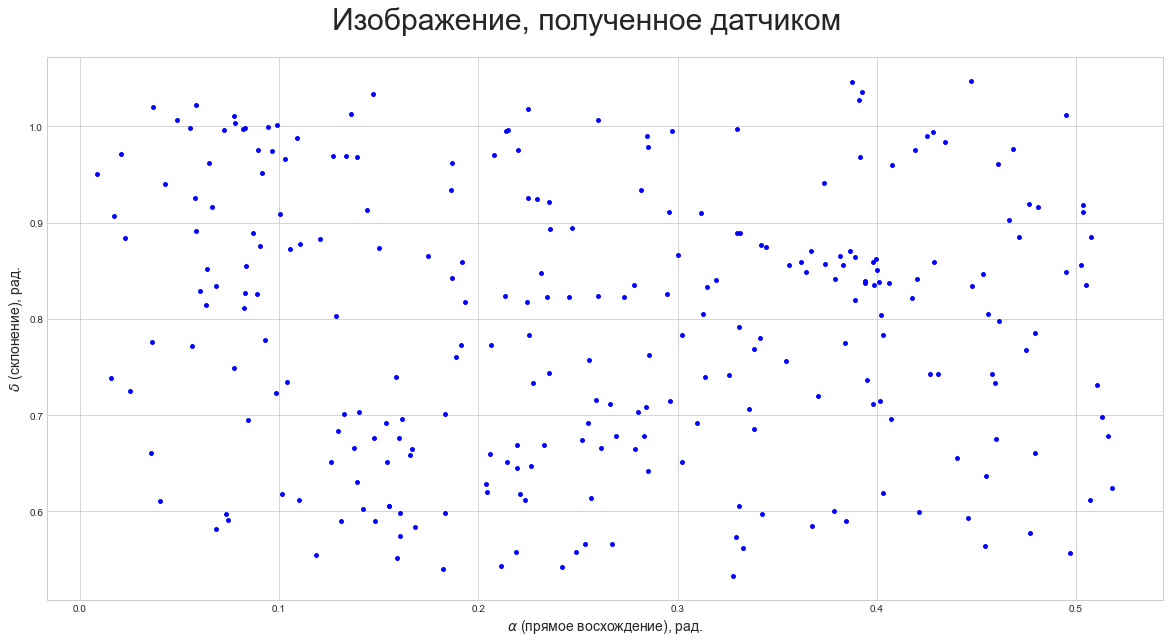

In [55]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Изображение, полученное датчиком', fontsize=30, y=0.95)

ax = fig.add_subplot()
# ax.scatter(df1.RA, df1.Dec, c ="red", s=0.5)
ax.scatter(df_test_with_cand.RA_rad_0, df_test_with_cand.Dec_rad_0, c ="blue", s=15)
ax.set_xlabel(r'$\alpha$ (прямое восхождение), рад.', fontsize=14)
ax.set_ylabel(r'$\delta$ (склонение), рад.', fontsize=14)
# fig.savefig('figures/Fig3.png', dpi=300)
plt.show()

In [56]:
dict_test_coordinates = dict()
# Ri[7] - обнулённая альфа (RA_rad)
# Ri[8] - обнулённая дельта (Dec_rad)
for i, Ri in df_test_with_cand.iterrows():
	dict_test_coordinates[i] = [Ri.RA_rad_0, Ri.Dec_rad_0]

# Отбор кандидатов

In [57]:
# Считает расстояние между звёздами i и j с прямым восхождением RA_i и RA_j (альфа) и склонением Dec_i и Dec_j (дельта)
def distance(Dec_i, RA_i, Dec_j, RA_j):
	kek = math.sin(Dec_i) * math.sin(Dec_j) + math.cos(Dec_i) * math.cos(Dec_j) * math.cos(RA_i - RA_j)
	return math.acos(max(-1,min(kek,1)))

In [58]:
def empty_dict(keys_list):
	ret = dict()
	for i in keys_list:
		ret[i] = []
	return ret


In [59]:
keys_list = list(candidates.keys())
true_candidate = empty_dict(keys_list)
eps_ij = 1e-5
for i in range(len(keys_list)):
	i_key = keys_list[i]
	Ri_coord = dict_test_coordinates[i_key]
	Ri_cands = candidates[i_key]
	for j in range(i + 1, len(keys_list)):
		j_key = keys_list[j]
		# print(j_key)
		Rj_coord = dict_test_coordinates[j_key]
		Rj_cands = candidates[j_key]
		real_dist_ij = distance(Ri_coord[1], Ri_coord[0], Rj_coord[1], Rj_coord[0])
		for candidate_i in Ri_cands:
			for candidate_j in Rj_cands:
				coordinates_i = [df2_coordinates_matrix[candidate_i][0], df2_coordinates_matrix[candidate_i][1]] #	 0й элемент - RA_rad;	 1й элемент - Dec_rad
				coordinates_j = [df2_coordinates_matrix[candidate_j][0], df2_coordinates_matrix[candidate_j][1]]
				dist_ij = distance(coordinates_i[1], coordinates_i[0], coordinates_j[1], coordinates_j[0])
				if abs(real_dist_ij - dist_ij) < eps_ij:
					# print(real_dist_ij, dist_ij, abs(real_dist_ij - dist_ij))
					true_candidate[i_key].append(candidate_i)
					true_candidate[j_key].append(candidate_j)

In [60]:
sum_list = []
for i in true_candidate:
	for j in true_candidate[i]:
		if j not in sum_list:
			sum_list.append(j)

In [61]:
count_hips = 0
for i, Ri in df_test.iterrows():
	hip = Ri[1]
	for j, Rj in df2.loc[sum_list].iterrows():
		if (hip == Rj[0]):
			count_hips += 1

In [62]:
count_hips

104

In [63]:
df2.loc[sum_list]

,Hip,Mag,RA,Dec,RA_rad,Dec_rad
581,9505,4.99,30.575309,54.487549,0.533640,0.950987
598,9640,2.10,30.974663,42.329848,0.540610,0.738795
611,9977,4.78,32.121441,37.859183,0.560625,0.660767
612,9990,5.66,32.169086,58.423605,0.561456,1.019684
618,10064,3.00,32.385504,34.987392,0.565234,0.610645
...,...,...,...,...,...,...
1087,18434,5.49,59.119534,35.080908,1.031831,0.612277
1090,18453,5.28,59.151816,50.695692,1.032394,0.884807
1093,18532,2.90,59.463421,40.010273,1.037832,0.698311
1095,18565,6.32,59.621392,38.840350,1.040590,0.677892


In [64]:
for i in true_candidate:
	for j in true_candidate[i]:
		one_candidate = []
		if j not in one_candidate:
			one_candidate.append(j)
		true_candidate[i] = one_candidate

In [65]:
true_candidate[3]

[581]

# Отсев по квантилям

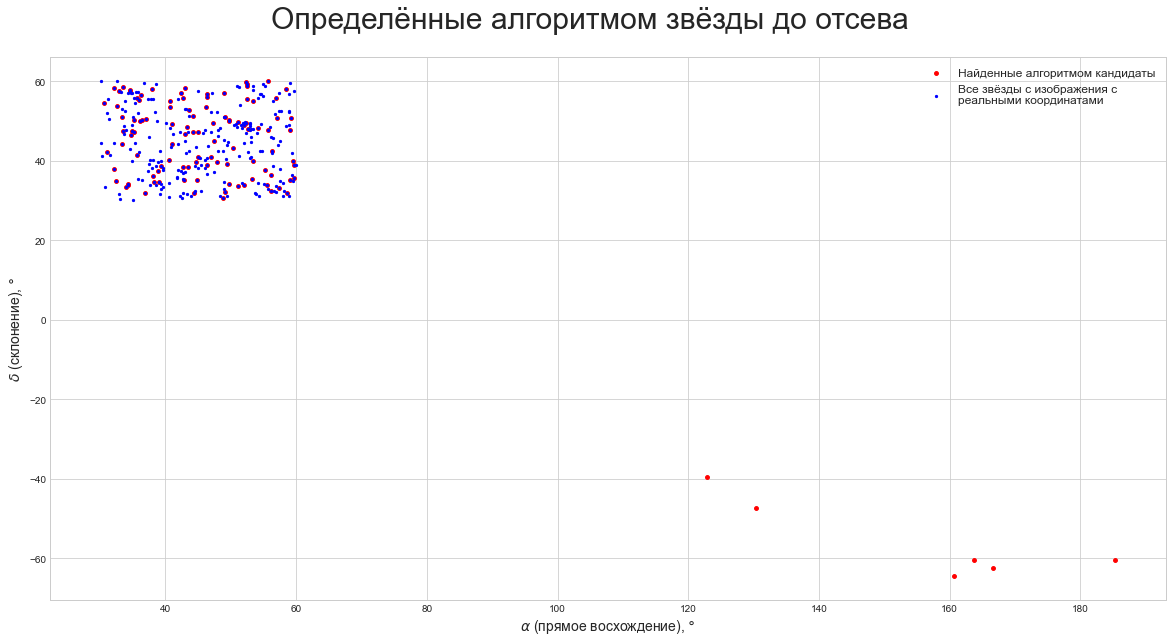

In [66]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Определённые алгоритмом звёзды до отсева', fontsize=30, y=0.95)

ax = fig.add_subplot()
ax.scatter(df2.loc[sum_list].RA, df2.loc[sum_list].Dec, c ="red", s=15, label='Найденные алгоритмом кандидаты')
ax.scatter(df_test.RA, df_test.Dec, c ="blue", s=5, label='Все звёзды с изображения с\nреальными координатами')

ax.set_xlabel(r'$\alpha$ (прямое восхождение), $\degree$', fontsize=14)
ax.set_ylabel(r'$\delta$ (склонение), $\degree$', fontsize=14)
ax.legend(fontsize=12)

plt.show()

In [67]:
print(sum_list)
print(len(sum_list))

[581, 598, 611, 612, 618, 620, 627, 2365, 637, 639, 640, 642, 649, 2225, 653, 654, 656, 658, 663, 664, 669, 670, 677, 679, 683, 685, 689, 691, 697, 698, 3385, 712, 717, 719, 731, 733, 740, 764, 767, 768, 773, 776, 798, 803, 805, 808, 809, 810, 816, 818, 3042, 820, 830, 832, 834, 842, 845, 849, 852, 868, 870, 872, 873, 882, 884, 885, 894, 912, 914, 2986, 917, 919, 924, 929, 931, 932, 946, 954, 955, 2929, 966, 968, 969, 970, 973, 976, 977, 981, 992, 995, 996, 1005, 1017, 1022, 1024, 1026, 1030, 1032, 1038, 1054, 1059, 1068, 1080, 1081, 1085, 1087, 1090, 1093, 1095, 1099]
110


In [68]:
df2.loc[sum_list]

,Hip,Mag,RA,Dec,RA_rad,Dec_rad
581,9505,4.99,30.575309,54.487549,0.533640,0.950987
598,9640,2.10,30.974663,42.329848,0.540610,0.738795
611,9977,4.78,32.121441,37.859183,0.560625,0.660767
612,9990,5.66,32.169086,58.423605,0.561456,1.019684
618,10064,3.00,32.385504,34.987392,0.565234,0.610645
...,...,...,...,...,...,...
1087,18434,5.49,59.119534,35.080908,1.031831,0.612277
1090,18453,5.28,59.151816,50.695692,1.032394,0.884807
1093,18532,2.90,59.463421,40.010273,1.037832,0.698311
1095,18565,6.32,59.621392,38.840350,1.040590,0.677892


In [69]:
# Отсев флуктуаций по альфа
print('Отсев флуктуаций по альфа')
print('№ звезды           альфа')
max_diff_alfa = alfa_max - alfa_min
while (df2.loc[sum_list].RA.max() - df2.loc[sum_list].RA.min() > max_diff_alfa):
	RA_list = df2.loc[sum_list].RA.values.tolist()
	for i in range(len(sum_list) - 1, -1, -1):
		min_lim = np.quantile(RA_list, 0.01)
		max_lim = np.quantile(RA_list, 0.99)
		RA_i = df2['RA'].loc[sum_list[i]]
		if RA_i < min_lim or RA_i > max_lim:
			print(i, '            ', RA_i)
			sum_list = np.delete(sum_list, i)

Отсев флуктуаций по альфа
№ звезды           альфа
50              166.6353096
30              185.34088035
1              30.9746628
0              30.5753091
75              160.73927790000002
65              163.8219291
1              32.169086099999994
0              32.121441
9              122.8395843
3              130.30475025
1              32.5321881
0              32.3855037


In [70]:
# Отсев флуктуаций по дельта
max_diff_delta = delta_max - delta_min
while (df2.loc[sum_list].Dec.max() - df2.loc[sum_list].Dec.min() > max_diff_delta):
	Dec_list = df2.loc[sum_list].Dec.values.tolist()
	for i in range(len(sum_list) - 1, -1, -1):
		min_lim = np.quantile(Dec_list, 0.01)
		max_lim = np.quantile(Dec_list, 0.99)
		Dec_i = df2['Dec'].loc[sum_list[i]]
		if Dec_i < min_lim or RA_i > max_lim:
			print(i, Dec_i)
			sum_list = np.delete(sum_list, i)

# Визуализация результата

In [71]:
pole_stars_on_image = len(df_test_pole_stars)
found_stars = len(df2.loc[sum_list])
eta = round(100 * float(found_stars) / pole_stars_on_image, 2)
print(eta)

92.45


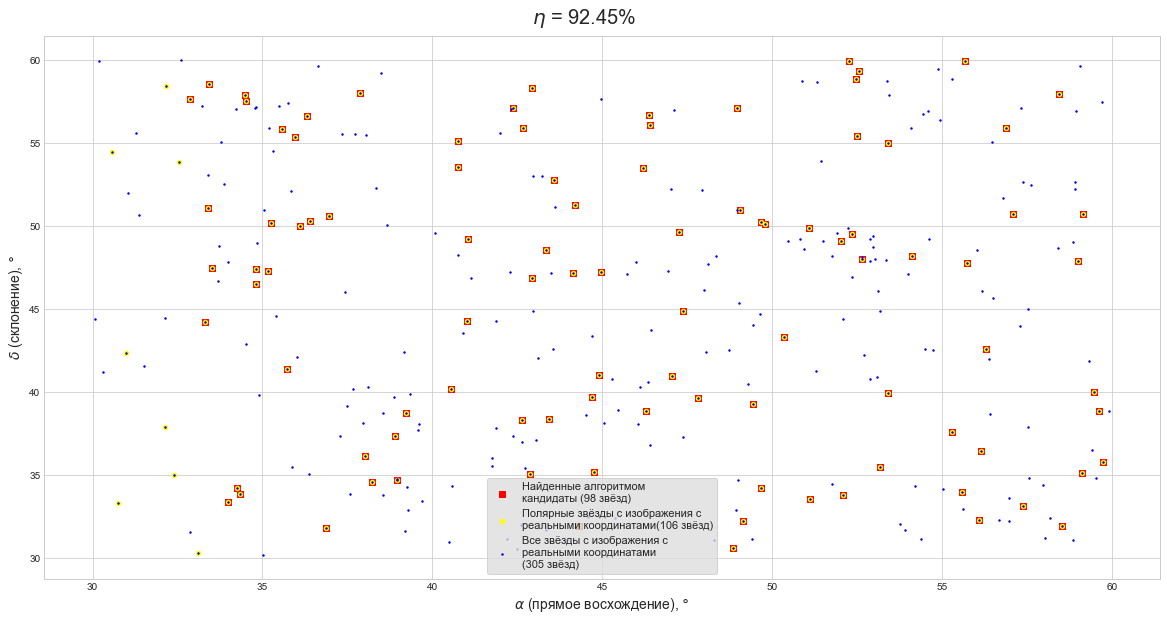

In [72]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle(r'$\eta$ = ' + f'{eta}%', fontsize=20, y=0.92)

ax = fig.add_subplot()
ax.scatter(df2.loc[sum_list].RA, df2.loc[sum_list].Dec, c ="red", s=35, label=f'Найденные алгоритмом \nкандидаты ({found_stars} звёзд)', marker='s')
ax.scatter(df_test_pole_stars.RA, df_test_pole_stars.Dec, c ="yellow", s=20, label=f'Полярные звёзды с изображения с\nреальными координатами({pole_stars_on_image} звёзд)')
ax.scatter(df_test.RA, df_test.Dec, c ="blue", s=2, label=f'Все звёзды с изображения с\nреальными координатами\n({len(df_test)} звёзд)')

ax.set_xlabel(r'$\alpha$ (прямое восхождение), $\degree$', fontsize=14)
ax.set_ylabel(r'$\delta$ (склонение), $\degree$', fontsize=14)

legend = ax.legend(fontsize=18, frameon = 1, prop={'size': 11})
frame = legend.get_frame()
frame.set_facecolor('#dedede')

plt.show()